In [1]:
import sys
sys.path.append('../src/')

In [2]:
# Third-party libraries:
import numpy as np
from sklearn.datasets import load_digits
# My libraries:
import dataset.dataset as dtset
from dbclass.dbclass import DBCLASS
from dbclass import dbclass_utils as db_utils


In [3]:
# import some data to play with
ds = load_digits()
ds

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
# Splitting the data for trainning and for test:
ds_train, ds_test = dtset.split_data(ds, prop_train=0.8)

0% concluído...
0% concluído...
10% concluído...
20% concluído...
30% concluído...
40% concluído...
50% concluído...
60% concluído...
70% concluído...
80% concluído...
90% concluído...


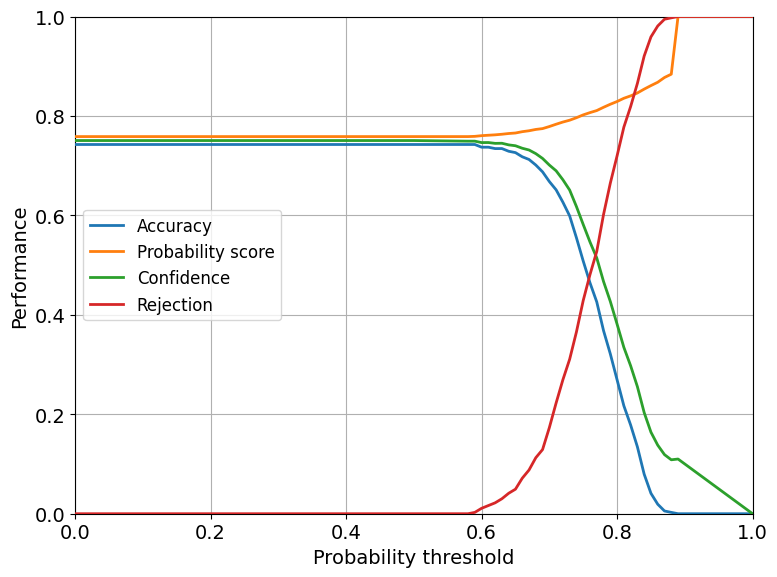


Best probability threshold value: 0.0
accuracy 0.742568
prob_score 0.758488
rejection 0
confidence 0.750528


In [5]:
# Trainning the model using cross validation in the trainning dataset:
dbclass = DBCLASS()
# prob_thold_list = [0, 0.1, 0.2, 0.3] + list(np.arange(0.4, 0.6, 0.01)) + [0.6, 0.7, 0.8, 0.999]
prob_thold_list = np.append(np.arange(0, 1, 0.01), 0.999)
best_prob_thold, class_metrics = db_utils.cross_validation_trainning(dbclass, ds_train, ds_test, prob_thold_list)
print("\nBest probability threshold value:", best_prob_thold)
for metric in class_metrics.keys():
    print(metric, class_metrics[metric])

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       178
           1       0.59      0.86      0.70       182
           2       0.85      0.88      0.86       177
           3       0.94      0.84      0.88       183
           4       0.85      0.90      0.88       181
           5       0.90      0.81      0.86       182
           6       0.99      0.83      0.90       181
           7       0.89      0.86      0.88       179
           8       0.85      0.59      0.69       174
           9       0.64      0.84      0.72       180

    accuracy                           0.82      1797
   macro avg       0.85      0.82      0.83      1797
weighted avg       0.85      0.82      0.83      1797


Confusion matrix:
[[8.24 0.17 0.   0.   0.39 0.22 0.11 0.   0.06 0.72 0.  ]
 [0.   8.68 0.45 0.   0.06 0.06 0.   0.   0.06 0.83 0.  ]
 [0.   0.83 8.63 0.06 0.   0.   0.   0.11 0.06 0.17 0.  ]
 [0.   0.17 0.22 8.51 0.   0.17 0.   0.17 0.28 0

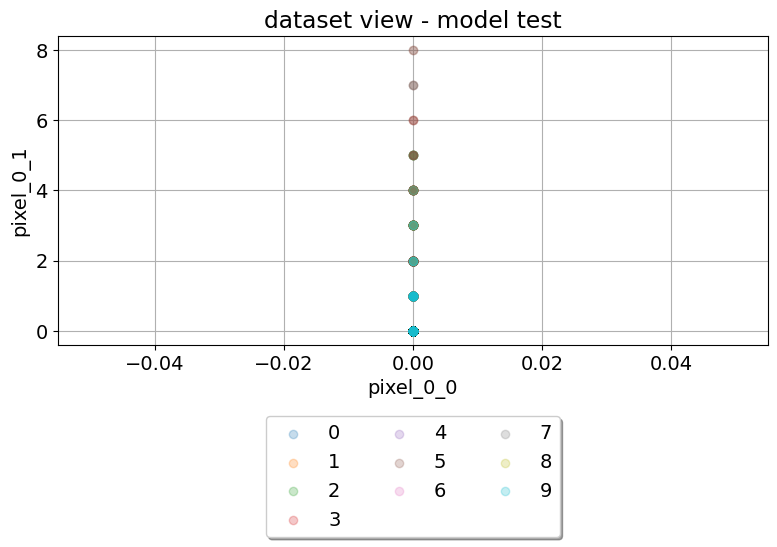

In [6]:
# Once the best probability score threshold is found, the classifier is
# configured with the best settings:
dbclass = DBCLASS(prob_thold=best_prob_thold)
dbclass.fit(ds['data'], ds['target'])
db_utils.dbclass_model_test(dbclass, ds)